In [406]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [437]:
train = pd.read_csv('train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';')

In [438]:
train

,Student ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,8,5,2,1,1,1,13,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,2,1,6,1,11,1,1,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,3,1,1,5,5,1,1,1,22,27,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,4,1,8,2,15,1,1,1,23,27,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,5,2,12,1,3,0,1,1,22,28,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,2207,1,1,5,9,1,1,1,24,29,...,0,5,0,0,0.000000,0,11.1,0.6,2.02,Dropout
2207,2208,1,14,1,9,1,1,1,22,14,...,0,5,9,3,13.333333,2,16.2,0.3,-0.92,Enrolled
2208,2209,1,8,2,9,1,1,1,23,28,...,0,5,9,3,10.571429,0,10.8,1.4,1.74,Enrolled
2209,2210,1,1,5,15,1,1,1,1,28,...,0,6,0,0,0.000000,0,11.1,0.6,2.02,Dropout


In [408]:
# # Mother's occupation
# # student = 1
# # low = 2
# # intermediate = 3
# # high = 4

# train["Mother's occupation"] = train["Mother's occupation"].map({ 1: 1, 2: 4, 3: 4, 4: 4, 5: 3,
#                                                     6: 3, 7: 3, 8: 3, 9: 3, 10: 2, 11: 3,
#                                                     12:0, 13:0, 14: 4, 15: 4,
#                                                     16:4, 18:3, 19:3, 20:3, 21:4, 22:3,
#                                                     23:3, 24:3, 27:2, 28:2, 29:2, 30:2,
#                                                     31:2, 32:2})

# test["Mother's occupation"] = test["Mother's occupation"].map({ 1: 1, 2: 4, 3: 4, 4: 4, 5: 3,
#                                                     6: 3, 7: 3, 8: 3, 9: 3, 10: 2, 11: 3,
#                                                     12:0, 13:0, 14: 4, 15: 4,
#                                                     16:4, 18:3, 19:3, 20:3, 21:4, 22:3,
#                                                     23:3, 24:3, 27:2, 28:2, 29:2, 30:2,
#                                                     31:2, 32:2})

In [409]:
# # Father's occupation
# # student = 1
# # low = 2
# # intermediate = 3
# # high = 4

# train["Father's occupation"] = train["Father's occupation"].map({ 1: 1, 2: 4, 3: 4, 4: 4, 5: 3,
#                                                     6: 3, 7: 3, 8: 3, 9: 3, 10: 2, 11: 3,
#                                                     12:0, 13:0, 14: 4, 15: 4,
#                                                     16:4, 18:3, 19:3, 20:3, 21:4, 22:3,
#                                                     23:3, 24:3, 27:2, 28:2, 29:2, 30:2,
#                                                     31:2, 34:2, 35:2, 36:2, 37:2, 39:2,
#                                                     40:2, 41:2, 42:2, 43:2,
#                                                     44:2, 45:2, 46:2})

# test["Father's occupation"] = test["Father's occupation"].map({ 1: 1, 2: 4, 3: 4, 4: 4, 5: 3,
#                                                     6: 3, 7: 3, 8: 3, 9: 3, 10: 2, 11: 3,
#                                                     12:0, 13:0, 14: 4, 15: 4,
#                                                     16:4, 18:3, 19:3, 20:3, 21:4, 22:3,
#                                                     23:3, 24:3, 27:2, 28:2, 29:2, 30:2,
#                                                     31:2, 34:2, 35:2, 36:2, 37:2, 39:2,
#                                                     40:2, 41:2, 42:2, 43:2,
#                                                     44:2, 45:2, 46:2})

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


x = train.drop(['Student ID','Target'], axis='columns')
# x = pd.get_dummies(x, columns=[i for i in x.columns if train[i].nunique() < 10 and 'Application order' not in i])
y = train.Target
y = np.where(y == 'Dropout', 0, np.where(y=='Graduate', 1, 2))

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 15)


### K nearest neighbor (Worst?)

0.6582278481012658


<AxesSubplot:>

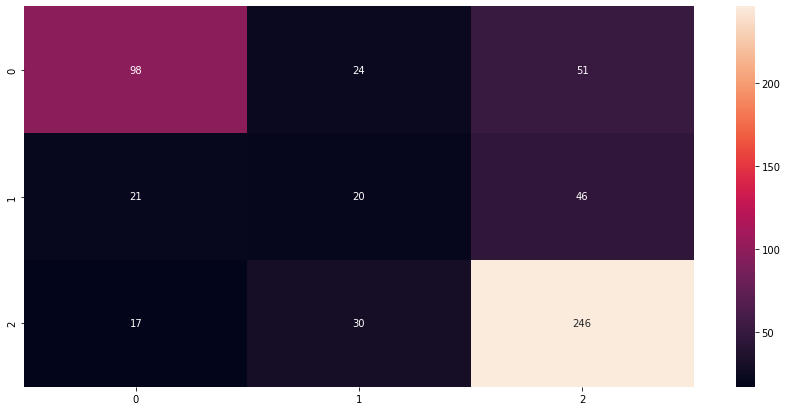

In [444]:
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)

y_pred_knn = knnclassifier.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True,fmt='g')

In [445]:
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, x, y, cv=5, scoring ='accuracy'))

print(f"The F1 Score for the KNN model: {f1_score(y_true=y_test, y_pred=y_pred_knn, average='micro')}")

[0.67042889 0.69457014 0.63348416 0.68099548 0.65158371]
The F1 Score for the KNN model: 0.6582278481012658


In [446]:
# Classification report
print(classification_report(y_test, y_pred_knn, target_names=y_test.unique()))

# >>> Terrible performance for the middle class, good results for the other two classes (the first and last class)

              precision    recall  f1-score   support

     Dropout       0.72      0.57      0.63       173
    Enrolled       0.27      0.23      0.25        87
    Graduate       0.72      0.84      0.77       293

    accuracy                           0.66       553
   macro avg       0.57      0.55      0.55       553
weighted avg       0.65      0.66      0.65       553



In [414]:
knnclassifier.fit(x_train, y_train)

pd.DataFrame({'predicted': knnclassifier.predict(x_test), 'truth':y_test})

,predicted,truth
1950,Dropout,Dropout
503,Dropout,Dropout
1112,Graduate,Enrolled
597,Dropout,Dropout
1718,Dropout,Dropout
...,...,...
1851,Enrolled,Dropout
1933,Graduate,Graduate
31,Graduate,Graduate
173,Dropout,Graduate


In [415]:
# # Output for the test dataset
# pd.DataFrame({'Student ID':test['Student ID'], 'Target':knnclassifier.predict(test.loc[:, test.columns != 'Student ID'])}).to_csv('predicted_knn.csv', index=False)

### Multinomial logistic regression (Better than KNN)

In [450]:
from sklearn.linear_model import LogisticRegression
# With cross validation
logreg = LogisticRegression()
print(cross_val_score(logreg, x, y, cv=10, scoring = 'accuracy'),cross_val_score(logreg, x, y, cv=10, scoring = 'accuracy').mean())



[0.74324324 0.7918552  0.79638009 0.77828054 0.76923077 0.760181
 0.78733032 0.76470588 0.78733032 0.74208145] 0.7720618808854103


In [448]:
logreg.fit(X=train.drop(columns=['Target']), y=train.Target)

LogisticRegression()

In [449]:
test_df = pd.DataFrame({'StudentID':test['Student ID'], 'Target':logreg.predict(test)})
test_df.to_csv('test_2.csv', index=False)

In [419]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.773 (0.024)


The F1 Score for the logistic regression model: 0.7739602169981917


<AxesSubplot:>

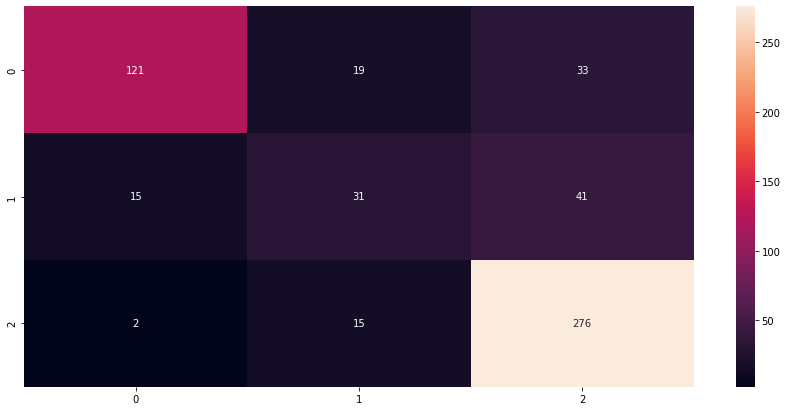

In [434]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

y_true = y_test
y_pred_log = logreg.predict(x_test)

# F1 Score for LogReg
print(
    f"The F1 Score for the logistic regression model: {f1_score(y_true=y_test, y_pred=y_pred_log, average='micro')}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_log)

plt.figure(figsize=(15, 7))
sns.heatmap(cm, annot=True, fmt='g')


In [421]:
# Classification report
print(classification_report(y_test, y_pred_log, target_names=y_test.unique()))

# >>> AGAIN! Bad performance for the middle class, good results for the other two classes (the first and last class)

              precision    recall  f1-score   support

     Dropout       0.88      0.70      0.78       173
    Enrolled       0.48      0.36      0.41        87
    Graduate       0.79      0.94      0.86       293

    accuracy                           0.77       553
   macro avg       0.71      0.67      0.68       553
weighted avg       0.77      0.77      0.76       553



In [432]:
pd.DataFrame({'predicted': logreg.predict(x_test), 'truth':y_test})

,predicted,truth
1950,Dropout,Dropout
503,Dropout,Dropout
1112,Graduate,Enrolled
597,Dropout,Dropout
1718,Enrolled,Dropout
...,...,...
1851,Graduate,Dropout
1933,Graduate,Graduate
31,Graduate,Graduate
173,Enrolled,Graduate


In [423]:
test2 = pd.get_dummies(test, columns=[i for i in test.columns if test[i].nunique() < 10 and 'Application order' not in i])
test2

,Student ID,Application mode,Application order,Course,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,International_1,Inflation rate_-0.8,Inflation rate_-0.3,Inflation rate_0.3,Inflation rate_0.5,Inflation rate_0.6,Inflation rate_1.4,Inflation rate_2.6,Inflation rate_2.8,Inflation rate_3.7
0,2212,1,1,5,1,1,22,27,10,10,...,0,1,0,0,0,0,0,0,0,0
1,2213,1,1,7,1,1,23,14,6,6,...,0,0,0,0,0,0,1,0,0,0
2,2214,1,1,10,1,1,13,28,10,10,...,0,0,0,1,0,0,0,0,0,0
3,2215,15,1,4,14,1,13,14,10,8,...,0,0,0,0,1,0,0,0,0,0
4,2216,1,2,15,1,1,3,1,3,5,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,4420,1,6,15,1,1,1,1,6,5,...,0,0,0,0,0,0,0,0,1,0
2209,4421,1,2,15,1,19,1,1,10,10,...,1,0,0,0,0,1,0,0,0,0
2210,4422,1,1,12,1,1,22,27,10,10,...,0,0,1,0,0,0,0,0,0,0
2211,4423,1,1,9,1,1,22,27,8,5,...,0,1,0,0,0,0,0,0,0,0


In [435]:
# Output for the test dataset - Multinomial Logistic Regression
pd.DataFrame({'StudentID':test2['Student ID'], 'Target':logreg.predict(test2)}).to_csv('predicted_logreg.csv', index=False)

### SVM (Better than KNN)

In [425]:
from sklearn import svm
svm_model = svm.SVC(C = 9,
                kernel='poly', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
               )

svm_model.fit(x_train, y_train)
svm_model.score(x_test, y_test)

0.7576853526220615

<AxesSubplot:>

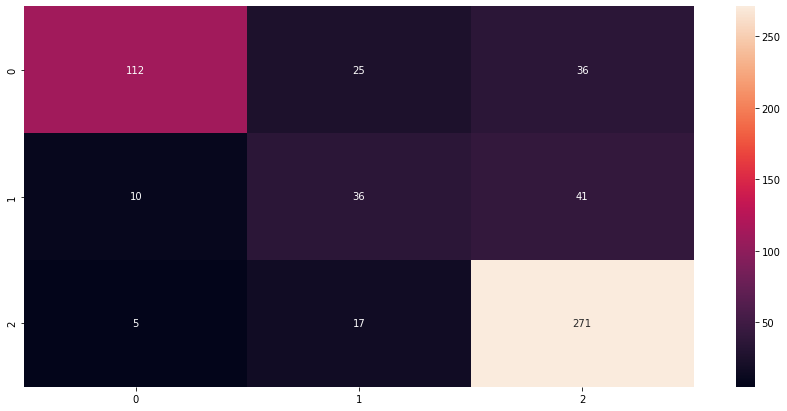

In [426]:
svm_y_pred = svm_model.predict(x_test)
cm = confusion_matrix(y_test, svm_y_pred)

plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True,fmt='g')


In [427]:
print(classification_report(y_test, svm_y_pred, target_names=y_test.unique()))


              precision    recall  f1-score   support

     Dropout       0.88      0.65      0.75       173
    Enrolled       0.46      0.41      0.44        87
    Graduate       0.78      0.92      0.85       293

    accuracy                           0.76       553
   macro avg       0.71      0.66      0.68       553
weighted avg       0.76      0.76      0.75       553



In [428]:
pd.DataFrame({'predicted': svm_y_pred, 'truth':y_test})


,predicted,truth
1950,Dropout,Dropout
503,Dropout,Dropout
1112,Graduate,Enrolled
597,Dropout,Dropout
1718,Dropout,Dropout
...,...,...
1851,Graduate,Dropout
1933,Graduate,Graduate
31,Enrolled,Graduate
173,Graduate,Graduate


In [429]:
pd.DataFrame({'Student ID':test['Student ID'], 'Target':svm_model.predict(test.loc[:, test.columns != 'Student ID'])}).to_csv('predicted_svm.csv', index=False)

ValueError: X.shape[1] = 34 should be equal to 55, the number of features at training time

### Decision tree

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='gini', splitter="best", random_state=5)
tree_model.fit(x_train, y_train)
tree_model.score(x_test, y_test)

0.7106690777576854

<AxesSubplot:>

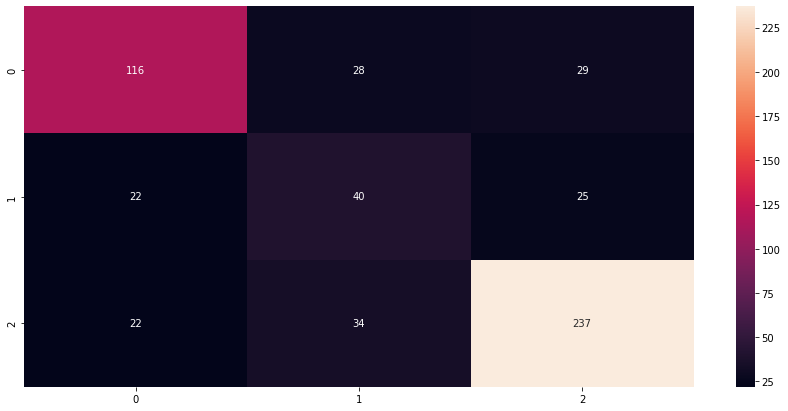

In [ ]:
tree_y_pred = tree_model.predict(x_test)
cm = confusion_matrix(y_test, tree_y_pred)

plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True,fmt='g')

In [ ]:
print(classification_report(y_test, tree_y_pred, target_names=y_test.unique()))

              precision    recall  f1-score   support

     Dropout       0.72      0.67      0.70       173
    Enrolled       0.39      0.46      0.42        87
    Graduate       0.81      0.81      0.81       293

    accuracy                           0.71       553
   macro avg       0.64      0.65      0.64       553
weighted avg       0.72      0.71      0.71       553



In [ ]:
pd.DataFrame({'predicted': tree_y_pred, 'truth':y_test})


,predicted,truth
1950,Dropout,Dropout
503,Dropout,Dropout
1112,Enrolled,Enrolled
597,Dropout,Dropout
1718,Enrolled,Dropout
...,...,...
1851,Graduate,Dropout
1933,Graduate,Graduate
31,Graduate,Graduate
173,Graduate,Graduate


In [ ]:
pd.DataFrame({'Student ID':test['Student ID'], 'Target':svm_model.predict(test.loc[:, test.columns != 'Student ID'])}).to_csv('predicted_dtree.csv', index=False)

In [ ]:
train

,Student ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,8,5,2,1,1,1,13,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,2,1,6,1,11,1,1,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,3,1,1,5,5,1,1,1,22,27,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,4,1,8,2,15,1,1,1,23,27,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,5,2,12,1,3,0,1,1,22,28,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,2207,1,1,5,9,1,1,1,24,29,...,0,5,0,0,0.000000,0,11.1,0.6,2.02,Dropout
2207,2208,1,14,1,9,1,1,1,22,14,...,0,5,9,3,13.333333,2,16.2,0.3,-0.92,Enrolled
2208,2209,1,8,2,9,1,1,1,23,28,...,0,5,9,3,10.571429,0,10.8,1.4,1.74,Enrolled
2209,2210,1,1,5,15,1,1,1,1,28,...,0,6,0,0,0.000000,0,11.1,0.6,2.02,Dropout


### RandomForest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
model.score(x_test,y_test)


0.7685352622061483

In [ ]:
model.predict(test)

ValueError: X has 35 features, but DecisionTreeClassifier is expecting 34 features as input.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import tensorflow as tf

In [ ]:
model = Sequential()


In [ ]:
y_train = np.where(y_train == 'Graduate', 1, np.where(y_train == 'Dropout', 2, 3))

In [ ]:
model.add(Dense(64, activation='relu', input_dim=x_train.columns.shape[0]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
x_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1826,1,1,1,10,1,1,1,23,1,6,...,0,0,6,6,6,14.333333,0,12.4,0.5,1.79
343,1,12,1,4,1,3,1,3,3,2,...,0,0,6,11,6,13.100000,0,16.2,0.3,-0.92
1847,2,12,1,17,0,1,1,21,12,10,...,0,0,5,7,2,10.000000,0,9.4,-0.8,-3.12
146,1,1,4,11,1,1,1,10,14,10,...,0,0,5,10,0,0.000000,0,7.6,2.6,0.32
1443,1,8,1,4,1,1,1,1,4,10,...,0,0,6,10,0,0.000000,0,16.2,0.3,-0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1,4,1,6,1,3,1,1,14,10,...,0,0,6,0,0,0.000000,0,15.5,2.8,-4.06
630,1,12,1,12,1,1,1,13,27,10,...,0,0,8,8,7,12.042857,0,12.7,3.7,-1.70
2133,1,8,5,12,1,1,1,1,1,5,...,0,0,8,12,8,13.050000,0,16.2,0.3,-0.92
1739,2,12,1,5,1,12,1,22,27,10,...,0,0,6,8,0,0.000000,0,10.8,1.4,1.74


In [ ]:
model.fit(x_train, y_train, epochs=1000, batch_size=128)

Epoch 1/1000
13/13 [==============================] - 0s 15ms/step - loss: 1.0090 - accuracy: 0.5350
Epoch 2/1000
13/13 [==============================] - 0s 15ms/step - loss: 1.0069 - accuracy: 0.5344
Epoch 3/1000
13/13 [==============================] - 0s 17ms/step - loss: 1.0120 - accuracy: 0.5344
Epoch 4/1000
13/13 [==============================] - 0s 16ms/step - loss: 1.0141 - accuracy: 0.5344
Epoch 5/1000
13/13 [==============================] - 0s 20ms/step - loss: 1.0101 - accuracy: 0.5344
Epoch 6/1000
13/13 [==============================] - 0s 17ms/step - loss: 1.0083 - accuracy: 0.5344
Epoch 7/1000
13/13 [==============================] - 0s 19ms/step - loss: 1.0061 - accuracy: 0.5344
Epoch 8/1000
13/13 [==============================] - 0s 18ms/step - loss: 1.0073 - accuracy: 0.5344
Epoch 9/1000
13/13 [==============================] - 0s 18ms/step - loss: 1.0084 - accuracy: 0.5344
Epoch 10/1000
13/13 [==============================] - 0s 23ms/step - loss: 1.0069 - accura

KeyboardInterrupt: 

In [ ]:
y_train

array([1, 1, 2, ..., 1, 2, 1])

In [453]:
import xgboost


In [487]:
model_xgboost = xgboost.XGBClassifier(learning_rate=0.01,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(x_test, y_test)]

model_xgboost.fit(x_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=False)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [488]:
y_train_pred = model_xgboost.predict_proba(x_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(x_test)[:,1]

In [489]:
model_xgboost.score(x_test, y_test)

0.7685352622061483

In [495]:
train.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [498]:
test['Target'] = model_xgboost.predict(test.drop(columns=['Student ID']))
test['Target'] = np.where(test.Target == 0, 'Dropout', np.where(test.Target == 1, 'Graduate', 'Enrolled'))

ValueError: Feature shape mismatch, expected: 34, got 35

In [499]:
test[['Student ID', 'Target']].to_csv('pred.csv', index=False)
